In [32]:
import twitter
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

In [2]:
consumer_key = '3hadC5cGfmdfYqVQ3EClF0VZd'
secret_key ='kjIfrQrSokxLirRZ21HstrJOJQZvuM9FmUDkNpRYrYjmhLtyWK'

access_token = '374743137-e4C4fLpqDqfjv7dVpe5S9SFQbWKZ9Ii8ci3dFa53'
secret_token = 'tGsYrurk2euQwZwaf2vZeuJCBQNTTYl7tiPmF7Qqffq2S'

In [3]:
api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=secret_key,
                  access_token_key=access_token,
                  access_token_secret=secret_token)

In [4]:
#other stuff that can be pulled, user mentions and the details of those users-including a member of the house of representatives.  
#retweet rate, favorites etc
#pull by user:  followers, following, tweet history etc.  

def format_tweets(resp):
    my_list = []
    counter = 0
    for i in resp['statuses']:
        #print(counter)
        counter +=1
        date = i['created_at']
        tweet_id = i['id']
        text = i['text']
        user_id = i['user']['id']
        user_name = i['user']['name']
        user_description=i['user']['description']
        user_location = i['user']['location']
        geo = i['geo']
        coordinates = i['coordinates']
        if i['place'] != None:
            place_name = i['place']['full_name']
        else:
            place_name =''
        hashtag = i['entities']['hashtags']
        my_list.append([date, text, user_id, user_name, user_description, user_location, geo, coordinates, place_name,hashtag,tweet_id])
    tweet_data = pd.DataFrame(my_list, columns =['date', 'text', 'user_id', 'user_name', 'user_description', 'user_location', 'geo', 'coordinates', 'place_name','hashtag','tweet_id'])
    tweet_data.date = pd.to_datetime(tweet_data.date)
    max_id = tweet_data.loc[tweet_data.date == min(tweet_data.date),'tweet_id'].values
    return(max_id, tweet_data)

In [8]:
def loop_query(max_id, loop_data, max_id_list, term, geocode):
    max_id_list.append(max_id)
    resp = api.GetSearch(term=term,geocode=geocode,count=100, result_type='recent', return_json=True, max_id=max_id)
    max_id, tweet_data = format_tweets(resp)
    loop_data = pd.concat([loop_data,tweet_data])
    return max_id[0], loop_data, max_id_list

In [14]:
def pull_all_data(term, geocode):
    #geocode format ='39.0119,-77.04310,5mi'
    loop_data =  pd.DataFrame()
    max_id_list= []
    max_id=''
    while max_id not in max_id_list:
        max_id, loop_data, max_id_list = loop_query(max_id,loop_data, max_id_list, term, geocode)
        print(len(max_id_list))
    return loop_data
    

In [ ]:
hospital_tweets = pull_all_data('','39.0149811,-77.0348775,1mi')

In [19]:
covid_tweets = pull_all_data('covid OR corona OR quarantine','39.0119214,-77.0432253,2mi')

1
2
3
4


In [44]:
hospital_tweets.to_csv('hospital.csv')
covid_tweets.to_csv('covid.csv')

In [43]:
def make_metrics(df,image_title):
    text_data = df.text.drop_duplicates()
    print(f'Total Unique Tweets: {len(df)}')
    print(f'Total Unique Text: {len(text_data)}')
    print(f'Total Unique Users: {df.user_id.nunique()}')
    print(f'DateRange: {min(df.date)} to {max(df.date)}')
    text_string = ','.join(text_data.values)
    pattern = r'https://t\.co/\w{10}'
    text_string = re.sub(pattern,'',text_string)
    text_string = text_string.replace('https','')
    text_string = text_string.replace('co','')
    text_string = text_string.replace('re','')
    wordcloud = WordCloud().generate(text_string)
    wordcloud.to_file(f'{image_title}.png')

make_metrics(hospital_tweets, 'hospital')
make_metrics(covid_tweets, 'covid')

Total Unique Tweets: 4426
Total Unique Text: 4357
Total Unique Users: 396
DateRange: 2020-03-29 09:22:28 to 2020-04-05 21:15:41
Total Unique Tweets: 169
Total Unique Text: 166
Total Unique Users: 107
DateRange: 2020-03-29 11:19:55 to 2020-04-05 20:44:30


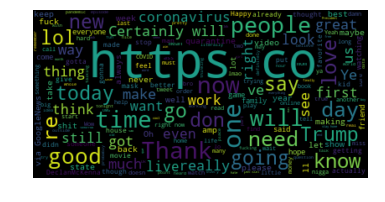

In [30]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('wordcloud.png')

# OLD

In [ ]:
#Query Params
q=Any Text
geocode
lang
result_type=recent, popular, mixed
until=anything before date in format YYYY-MM-DD good for one week onl
since_id=only return tweets after a given tweet
max_id = returns tweets only before a given date

In [ ]:
#t.search.tweets(q='#covid')
resp = t.search.tweets(geocode='39.0146,-77.03705,1mi',count=1000, result_type='recent')
resp['search_metadata']

In [ ]:
last_id, tweet_data = format_tweets(resp)

In [ ]:
resp2 = t.search.tweets(geocode='39.0146,-77.03705,1mi',count=1000, result_type='recent',max_id=last_id[0])

In [ ]:
last_id2, tweet_data2 = format_tweets(resp2)

In [ ]:
tweet_data2

In [ ]:
max(tweet_data.date)